In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import urllib #download from football data

from __future__ import division
%matplotlib inline

### Load the data

In [2]:
testfile = urllib.URLopener()
testfile.retrieve("http://www.football-data.co.uk/mmz4281/1617/E0.csv", "./Data/England/E0_16.csv")

('./Data/England/E0_16.csv', <httplib.HTTPMessage instance at 0x7f75d8184c68>)

In [3]:
df = pd.read_csv("./Data/England/E0_16.csv")

In [4]:
df.columns

Index([u'Div', u'Date', u'HomeTeam', u'AwayTeam', u'FTHG', u'FTAG', u'FTR',
       u'HTHG', u'HTAG', u'HTR', u'Referee', u'HS', u'AS', u'HST', u'AST',
       u'HF', u'AF', u'HC', u'AC', u'HY', u'AY', u'HR', u'AR', u'B365H',
       u'B365D', u'B365A', u'BWH', u'BWD', u'BWA', u'IWH', u'IWD', u'IWA',
       u'LBH', u'LBD', u'LBA', u'PSH', u'PSD', u'PSA', u'WHH', u'WHD', u'WHA',
       u'VCH', u'VCD', u'VCA', u'Bb1X2', u'BbMxH', u'BbAvH', u'BbMxD',
       u'BbAvD', u'BbMxA', u'BbAvA', u'BbOU', u'BbMx>2.5', u'BbAv>2.5',
       u'BbMx<2.5', u'BbAv<2.5', u'BbAH', u'BbAHh', u'BbMxAHH', u'BbAvAHH',
       u'BbMxAHA', u'BbAvAHA', u'PSCH', u'PSCD', u'PSCA'],
      dtype='object')

### Cleaning and subsetting required data

Remove betting data as we don't need it for prediction. However, they could be good indicators of a team's current form - should try it out later.

In [81]:
res_16 = df.ix[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
# res_14 = df_14.ix[:,:23]
# res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = df.ix[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
bet_16 = df.ix[:,23:]

In [82]:
res_16.head()
feature_table = df.ix[:,:23]

In [83]:
res_16.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
318,Tottenham,Bournemouth,4.0,0.0,H,2.0,0.0,H,M Oliver,24.0,...,14.0,1.0,8.0,10.0,13.0,1.0,0.0,1.0,0.0,0.0
319,Watford,Swansea,1.0,0.0,H,1.0,0.0,H,L Mason,15.0,...,7.0,4.0,8.0,13.0,6.0,2.0,0.0,0.0,0.0,0.0
320,Man United,Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,West Brom,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,Middlesbrough,Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table_16 = table_16[:-10]

In [85]:
res_16 = res_16[:-10]
res_16.shape[0]

313

In [86]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print "Average number of goals at home",avg_home_scored_16
print "Average number of goals away", avg_away_scored_16
print "Average number of goals conceded at home",avg_home_conceded_16
print "Average number of goals conceded away",avg_away_conceded_16

Average number of goals at home 1.62619808307
Average number of goals away 1.19488817891
Average number of goals conceded at home 1.19488817891
Average number of goals conceded away 1.62619808307


In [87]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [88]:
# list(res_home)[0]

In [89]:
table_16.Team = res_home.HomeTeam.all().values
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,31.0,30.0,NaN,NaN,15.0,24.0,NaN,NaN
1,Bournemouth,27.0,18.0,NaN,NaN,26.0,33.0,NaN,NaN
2,Burnley,23.0,9.0,NaN,NaN,14.0,30.0,NaN,NaN
3,Chelsea,39.0,26.0,NaN,NaN,11.0,14.0,NaN,NaN
4,Crystal Palace,18.0,24.0,NaN,NaN,20.0,30.0,NaN,NaN
5,Everton,38.0,19.0,NaN,NaN,12.0,24.0,NaN,NaN
6,Hull,25.0,8.0,NaN,NaN,26.0,38.0,NaN,NaN
7,Leicester,26.0,13.0,NaN,NaN,18.0,33.0,NaN,NaN
8,Liverpool,41.0,27.0,NaN,NaN,16.0,24.0,NaN,NaN
9,Man City,27.0,33.0,NaN,NaN,15.0,20.0,NaN,NaN


In [90]:
#Assuming number of home games = number of away games
num_games = res_16.shape[0]/20

In [91]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,31.0,30.0,1.218075,1.604278,15.0,24.0,0.802139,0.943026
1,Bournemouth,27.0,18.0,1.060904,0.962567,26.0,33.0,1.390374,1.296660
2,Burnley,23.0,9.0,0.903733,0.481283,14.0,30.0,0.748663,1.178782
3,Chelsea,39.0,26.0,1.532417,1.390374,11.0,14.0,0.588235,0.550098
4,Crystal Palace,18.0,24.0,0.707269,1.283422,20.0,30.0,1.069519,1.178782
5,Everton,38.0,19.0,1.493124,1.016043,12.0,24.0,0.641711,0.943026
6,Hull,25.0,8.0,0.982318,0.427807,26.0,38.0,1.390374,1.493124
7,Leicester,26.0,13.0,1.021611,0.695187,18.0,33.0,0.962567,1.296660
8,Liverpool,41.0,27.0,1.611002,1.443850,16.0,24.0,0.855615,0.943026
9,Man City,27.0,33.0,1.060904,1.764706,15.0,20.0,0.802139,0.785855


In [92]:
table_16[table_16.Team == "Swansea"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
15,Swansea,22.0,15.0,0.86444,0.802139,33.0,34.0,1.764706,1.335953


In [93]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [94]:
feature_table.head(20)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Burnley,Swansea,A,3.0,9.0,0.903733,0.748663,0.802139,1.335953
1,Crystal Palace,West Brom,A,4.0,3.0,0.707269,1.069519,0.641711,0.864440
2,Everton,Tottenham,D,6.0,4.0,1.493124,0.641711,1.336898,0.550098
3,Hull,Leicester,H,5.0,5.0,0.982318,1.390374,0.695187,1.296660
4,Man City,Sunderland,H,4.0,3.0,1.060904,0.802139,0.534759,1.060904
5,Middlesbrough,Stoke,D,2.0,1.0,0.471513,0.909091,0.748663,1.100196
6,Southampton,Watford,D,6.0,1.0,0.667976,0.802139,0.641711,1.139489
7,Arsenal,Liverpool,A,5.0,7.0,1.218075,0.802139,1.443850,0.943026
8,Bournemouth,Man United,A,3.0,7.0,1.060904,1.390374,1.336898,0.510806
9,Chelsea,West Ham,H,6.0,3.0,1.532417,0.588235,1.283422,1.178782


In [95]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [96]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [97]:
feature_table = feature_table[:-10] #ONLY FOR WEEK 33. REMOVE FROM 34
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
303,Bournemouth,Chelsea,A,1.0,5.0,1.060904,1.390374,1.390374,0.550098,-1
304,Man City,Hull,H,7.0,1.0,1.060904,0.802139,0.427807,1.493124,1
305,Middlesbrough,Burnley,D,5.0,2.0,0.471513,0.909091,0.481283,1.178782,0
306,Stoke,Liverpool,A,4.0,4.0,0.785855,1.016043,1.443850,0.943026,-1
307,Tottenham,Watford,H,6.0,2.0,1.532417,0.427807,0.641711,1.139489,1
308,West Brom,Southampton,A,6.0,3.0,1.060904,1.016043,1.069519,0.864440,-1
309,West Ham,Swansea,H,6.0,1.0,0.707269,1.443850,0.802139,1.335953,1
310,Everton,Leicester,H,7.0,4.0,1.493124,0.641711,0.695187,1.296660,1
311,Sunderland,Man United,A,4.0,9.0,0.550098,1.550802,1.336898,0.510806,-1
312,Crystal Palace,Arsenal,H,6.0,3.0,0.707269,1.069519,1.604278,0.943026,1


In [98]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

In [100]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [101]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.48484848  0.59375     0.53125     0.53125     0.4375      0.59375
  0.66666667  0.46666667  0.63333333  0.6       ]
0.553901515152


In [102]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.42424242  0.59375     0.5625      0.5625      0.5625      0.5625
  0.46666667  0.5         0.63333333  0.73333333]
0.560132575758


In [103]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.57575758  0.6875      0.5         0.6875      0.625       0.6875      0.6
  0.6         0.66666667  0.63333333]
0.626325757576


In [104]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.42424242  0.625       0.59375     0.59375     0.625       0.5625
  0.66666667  0.56666667  0.76666667  0.6       ]
0.602424242424


## Adding Recent Performance

In [105]:
#What is this for?
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [106]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [107]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Middlesbrough','Arsenal','D',0,0,0,0,0,0],
                             ['Man United','Chelsea','D',0,0,0,0,0,0],
                             ['West Brom','Liverpool','D',0,0,0,0,0,0],
                             ['Southampton','Man City','D',0,0,0,0,0,0],
                             ['Watford','Swansea','D',0,0,0,0,0,0],
                             ['Stoke','Hull','D',0,0,0,0,0,0],
                             ['Everton','Burnley','D',0,0,0,0,0,0],
                             ['Sunderland','West Ham','D',0,0,0,0,0,0],
                             ['Crystal Palace','Leicester','D',0,0,0,0,0,0],
                             ['Tottenham','Bournemouth','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [108]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(323, 9)

In [109]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [229]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS
322,Middlesbrough,Arsenal,D,0.0,0.0,0.0,0.0,0.0,0.0,13.25,7.75,12.50,4.25,0.75,1.50,0.471513,0.909091,0.534759,0.785855
321,Man United,Chelsea,D,0.0,0.0,0.0,0.0,0.0,0.0,8.25,6.00,10.50,5.00,1.75,2.00,0.825147,0.588235,1.336898,0.510806
320,West Brom,Liverpool,D,0.0,0.0,0.0,0.0,0.0,0.0,12.00,5.50,9.50,5.75,0.75,2.00,1.060904,1.016043,0.641711,0.864440
319,Southampton,Man City,D,0.0,0.0,0.0,0.0,0.0,0.0,14.50,7.25,9.25,5.25,1.25,1.75,0.667976,0.802139,1.069519,0.864440
318,Watford,Swansea,D,0.0,0.0,0.0,0.0,0.0,0.0,13.75,7.00,13.00,5.50,0.75,0.25,0.943026,1.229947,0.641711,1.139489
317,Stoke,Hull,D,0.0,0.0,0.0,0.0,0.0,0.0,16.00,5.75,15.25,6.25,0.50,1.75,0.785855,1.016043,0.748663,1.100196
316,Everton,Burnley,D,0.0,0.0,0.0,0.0,0.0,0.0,10.00,4.25,15.00,3.25,2.50,0.25,1.493124,0.641711,1.016043,0.943026
315,Sunderland,West Ham,D,0.0,0.0,0.0,0.0,0.0,0.0,19.25,6.25,10.75,5.00,0.00,1.00,0.550098,1.550802,0.534759,1.060904
314,Crystal Palace,Leicester,D,0.0,0.0,0.0,0.0,0.0,0.0,16.50,7.00,14.25,6.25,1.75,2.25,0.707269,1.069519,1.283422,1.178782
313,Tottenham,Bournemouth,D,0.0,0.0,0.0,0.0,0.0,0.0,8.25,5.00,14.75,4.75,2.75,1.25,1.532417,0.427807,1.336898,0.550098


In [230]:
# for index,row in feat_table.iterrows():
#     #print row['HomeTeam'], table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values

In [231]:
# Adding k recent performance metrics. Change value of k.
k = 5
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

    feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [232]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [233]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [234]:
# num_games decides the train-test split
print feat_table.shape
num_games = feat_table.shape[0]-10
num_games

(323, 19)


313

In [235]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [236]:
### Try predictions here too.

# Adding home advantage

In [237]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [238]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print num_games
v_split = 15
n_games = num_games - v_split

313


In [239]:
test_table.head()

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
0,Burnley,Swansea,A,0.0,0.0,0.0,0.0,0.0,0.0,0.903733,0.748663,0.481283,1.178782,-1,0.0,0.0,0.0
1,Crystal Palace,West Brom,A,0.0,0.0,0.0,0.0,0.0,0.0,0.707269,1.069519,1.283422,1.178782,-1,0.0,0.0,0.0
2,Everton,Tottenham,D,0.0,0.0,0.0,0.0,0.0,0.0,1.493124,0.641711,1.016043,0.943026,0,0.0,0.0,0.0
3,Hull,Leicester,H,0.0,0.0,0.0,0.0,0.0,0.0,0.982318,1.390374,0.427807,1.493124,1,0.0,0.0,0.0
4,Man City,Sunderland,H,0.0,0.0,0.0,0.0,0.0,0.0,1.060904,0.802139,1.764706,0.785855,1,0.0,0.0,0.0


In [240]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [241]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
313,0.12,0.24,1.32,1.532417,0.427807,1.336898,0.550098
314,-0.08,-0.12,2.60,0.707269,1.069519,1.283422,1.178782
315,0.24,-0.24,3.40,0.550098,1.550802,0.534759,1.060904
316,-0.12,0.44,1.72,1.493124,0.641711,1.016043,0.943026
317,0.16,-0.28,2.68,0.785855,1.016043,0.748663,1.100196
318,0.40,0.16,2.92,0.943026,1.229947,0.641711,1.139489
319,0.24,0.08,2.68,0.667976,0.802139,1.069519,0.864440
320,-0.32,-0.28,2.16,1.060904,1.016043,0.641711,0.864440
321,0.52,-0.08,1.04,0.825147,0.588235,1.336898,0.510806
322,0.44,-0.16,2.36,0.471513,0.909091,0.534759,0.785855


In [242]:
# clf1.fit(X_train,y_train)
# #clf2.fit(X_train,y_train)
# clf3.fit(X_train,y_train)
# clf4.fit(X_train,y_train)
# clf5.fit(X_train,y_train)
# clf6.fit(X_train,y_train)

In [243]:
#KNN
plot_scores_knn = []
for b in xrange(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in xrange(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)


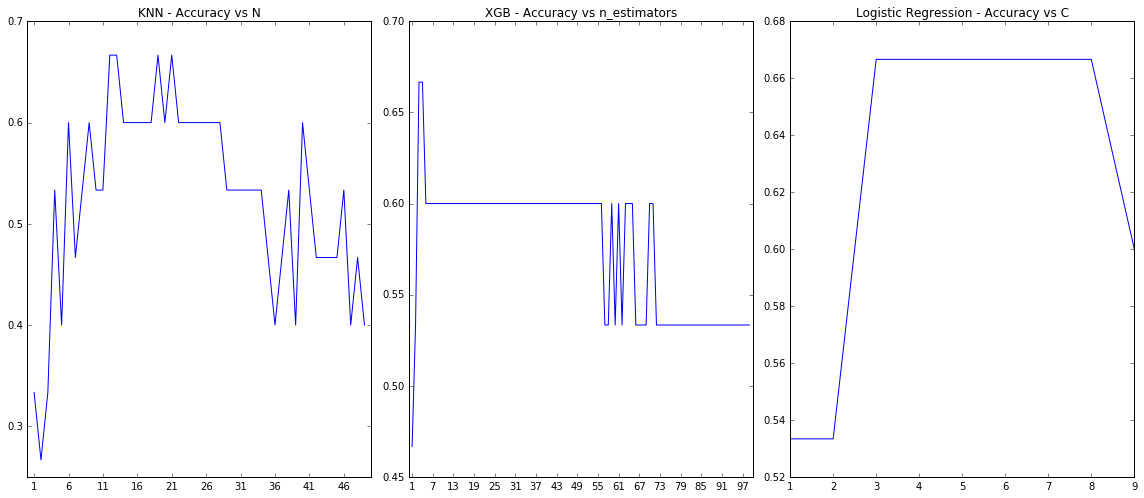

In [244]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(xrange(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(xrange(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(xrange(1,100),plot_scores_XGB);
ax2.set_xticks(xrange(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(xrange(1,10),plot_scores_logreg);
ax3.set_xticks(xrange(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [245]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e)

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

print max_knn_n, max_knn_ind
print max_XGB_e, max_XGB_ind
print max_logreg_c, max_logreg_ind

#max_knn_ind=15 
#max_XGB_ind=7
#max_logreg_ind=3



0.666666666667 11
0.666666666667 2
0.666666666667 2


In [246]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [247]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

In [248]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [249]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg
313,Tottenham,Bournemouth,1,1,1
314,Crystal Palace,Leicester,-1,-1,-1
315,Sunderland,West Ham,-1,-1,-1
316,Everton,Burnley,1,1,1
317,Stoke,Hull,0,-1,1
318,Watford,Swansea,1,1,1
319,Southampton,Man City,-1,1,1
320,West Brom,Liverpool,1,1,1
321,Man United,Chelsea,0,0,1
322,Middlesbrough,Arsenal,-1,-1,-1


In [250]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [251]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg"],axis=1,inplace=True)

In [252]:
print max_knn_n, max_XGB_e, max_logreg_c
this_week

0.666666666667 0.666666666667 0.666666666667


,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg
313,Tottenham,Bournemouth,H,H,H
314,Crystal Palace,Leicester,A,A,A
315,Sunderland,West Ham,A,A,A
316,Everton,Burnley,H,H,H
317,Stoke,Hull,D,A,H
318,Watford,Swansea,H,H,H
319,Southampton,Man City,A,H,H
320,West Brom,Liverpool,H,H,H
321,Man United,Chelsea,D,D,H
322,Middlesbrough,Arsenal,A,A,A
